# Notebook provides easy-to-use interface for classifying chemical images.

In [247]:
from IPython.display import display
import datetime
from pathlib import Path
import requests
from PIL import Image
import pandas as pd

# 1. Run Flask web server by typing the following in your terminal:
 
`gunicorn -w 1 -b 127.0.0.1:5000 --timeout 3600 chemic.app:app`

# 2. Chemical Images Classification Client

In [248]:
class ChemClassifierClient:
    """
    A client for interacting with the ChemIC application's server.

    Attributes:
        server_url (str): The URL of the ChemICR server.

    Methods:
        classify(image_path: str) -> dict:
            Sends a POST request to the server with the specified image path or directory.
            Returns the classification results in dictionary format.

        healthcheck() -> str:
            Sends a GET request to the server to check its health status.
            Returns the health status as a string.
    """
    def __init__(self, server_url):
        """
        Initializes a ChemRecognitionClient instance.

        Parameters:
            server_url (str): The URL of the ChemICR server.
        """
        self.server_url = server_url

    def classify_image(self, image_path: str):
        """
        Sends a POST request to the server with the specified image path or directory.
        Returns the classification results in dictionary format.

        Parameters:
            image_path (str): The path to the image file or directory to be processed.

        Returns:
            dict: Classification results, including image ID, predicted labels, and chemical structures.
        """
        try:
            # Create a dictionary with the image path or directory with images
            data = {'image_path': image_path}
            # Send a POST request to the server
            response = requests.post(f'{self.server_url}/classify_image', data=data)
            response.raise_for_status()  # Raise an HTTPError for bad responses
            # Parse the JSON response
            return response.json()

        except requests.exceptions.RequestException as e:
            return {'error': str(e)}

    def healthcheck(self):
        """
        Sends a GET request to the server to check its health status.
        Returns the health status as a string.

        Returns:
            str: The health status of the ChemICR server.
        """
        try:
            # Send a GET request to the server
            response = requests.get(f'{self.server_url}/healthcheck')
            response.raise_for_status()  # Raise an HTTPError for bad responses
            # Parse the JSON response
            return response.json()

        except requests.exceptions.RequestException as e:
            return {'error': str(e)}

In [255]:
# URL for the combined image processing endpoint
server_url = 'http://127.0.0.1:5000'

# Create an instance of the client
client = ChemClassifierClient(server_url)

# Check the health of the server
health_status = client.healthcheck().get('status')
print(f"Health Status: {health_status}")


Health Status: Server is up and running


# 3. Run cells below to classify single images in Benchmark/single_image

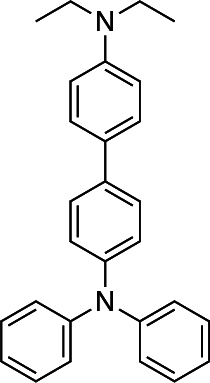

[{'image_id': 'US07314693-20080101-C00055.png',
  'predicted_label': 'single chemical structure',
  'program': 'ChemIC',
  'program_version': '1.2'}]

In [261]:
# Load an image for testing
image_path = '../Benchmark/single_image/US07314693-20080101-C00055.png'
image = Image.open(image_path).convert('RGB')
# Send POST request to classify and predict images
recognition_results = client.classify_image(image_path)
display(image)
recognition_results

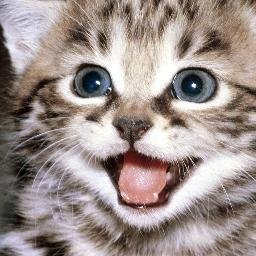

[{'image_id': 'cat_3.jpg',
  'predicted_label': 'no chemical structures',
  'program': 'ChemIC',
  'program_version': '1.2'}]

In [264]:
# Load an image for testing
image_path = '../Benchmark/single_image/cat_3.jpg'
image = Image.open(image_path).convert('RGB')
# Send POST request to classify and predict images
recognition_results = client.classify_image(image_path)
display(image)
recognition_results

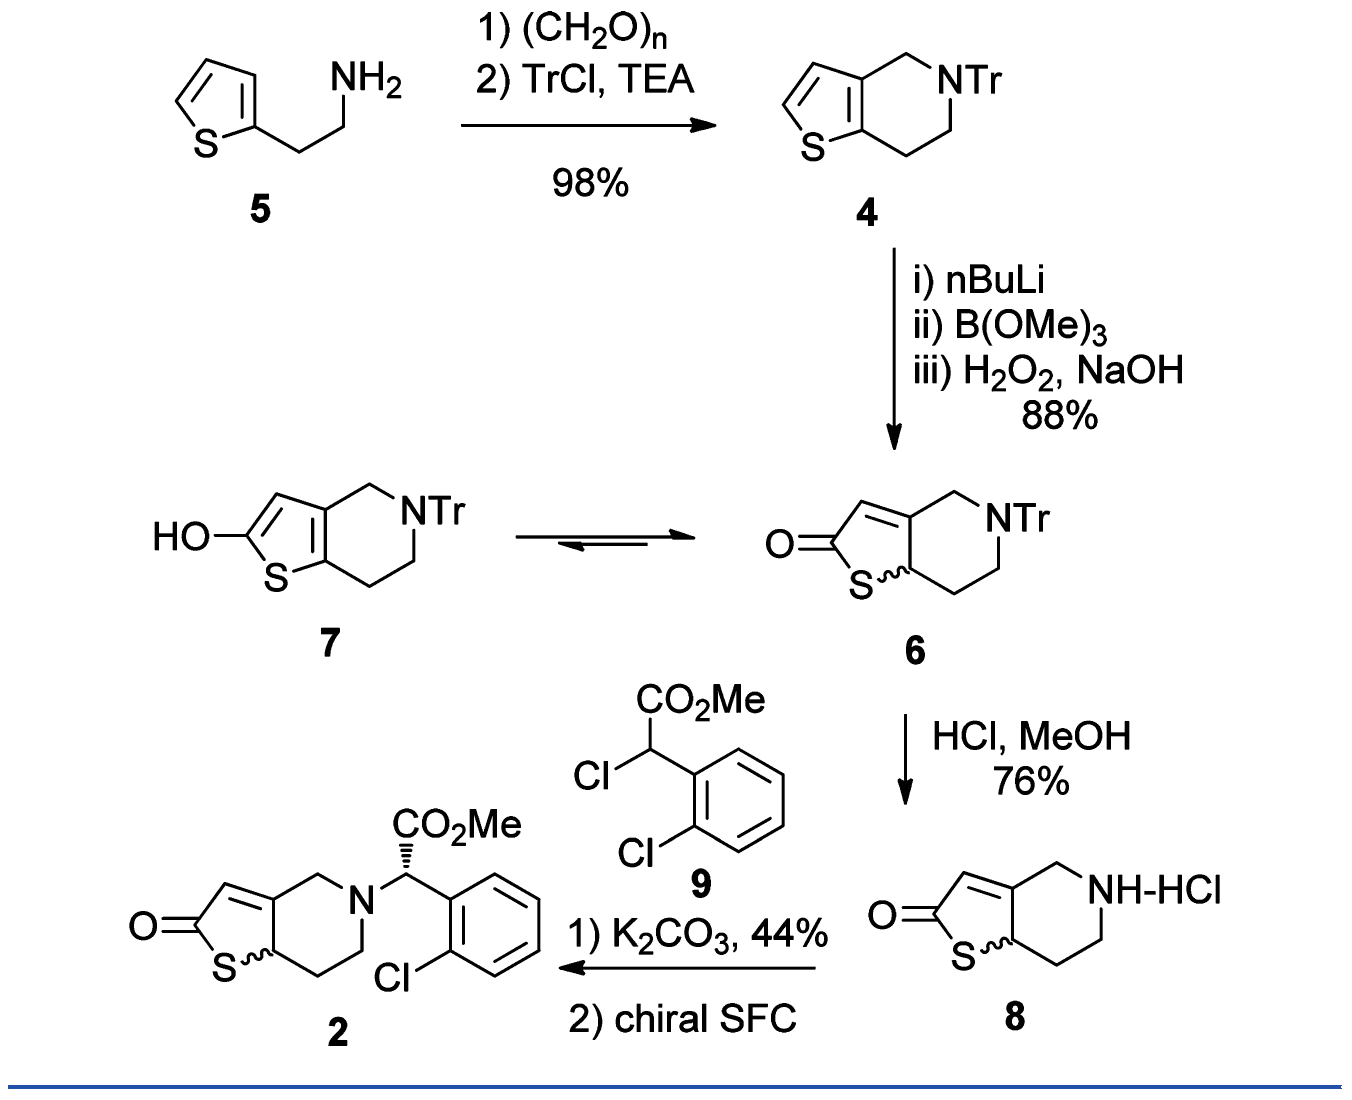

[{'image_id': 'acs.joc.5b00632-Scheme-c3.png',
  'predicted_label': 'chemical reactions',
  'program': 'ChemIC',
  'program_version': '1.2'}]

In [221]:
# Load an image for testing
image_path = '../Benchmark/single_image/acs.joc.5b00632-Scheme-c3.png'
image = Image.open(image_path).convert('RGB')
# Send POST request to classify and predict images
recognition_results = client.classify_image(image_path)
display(image)
recognition_results

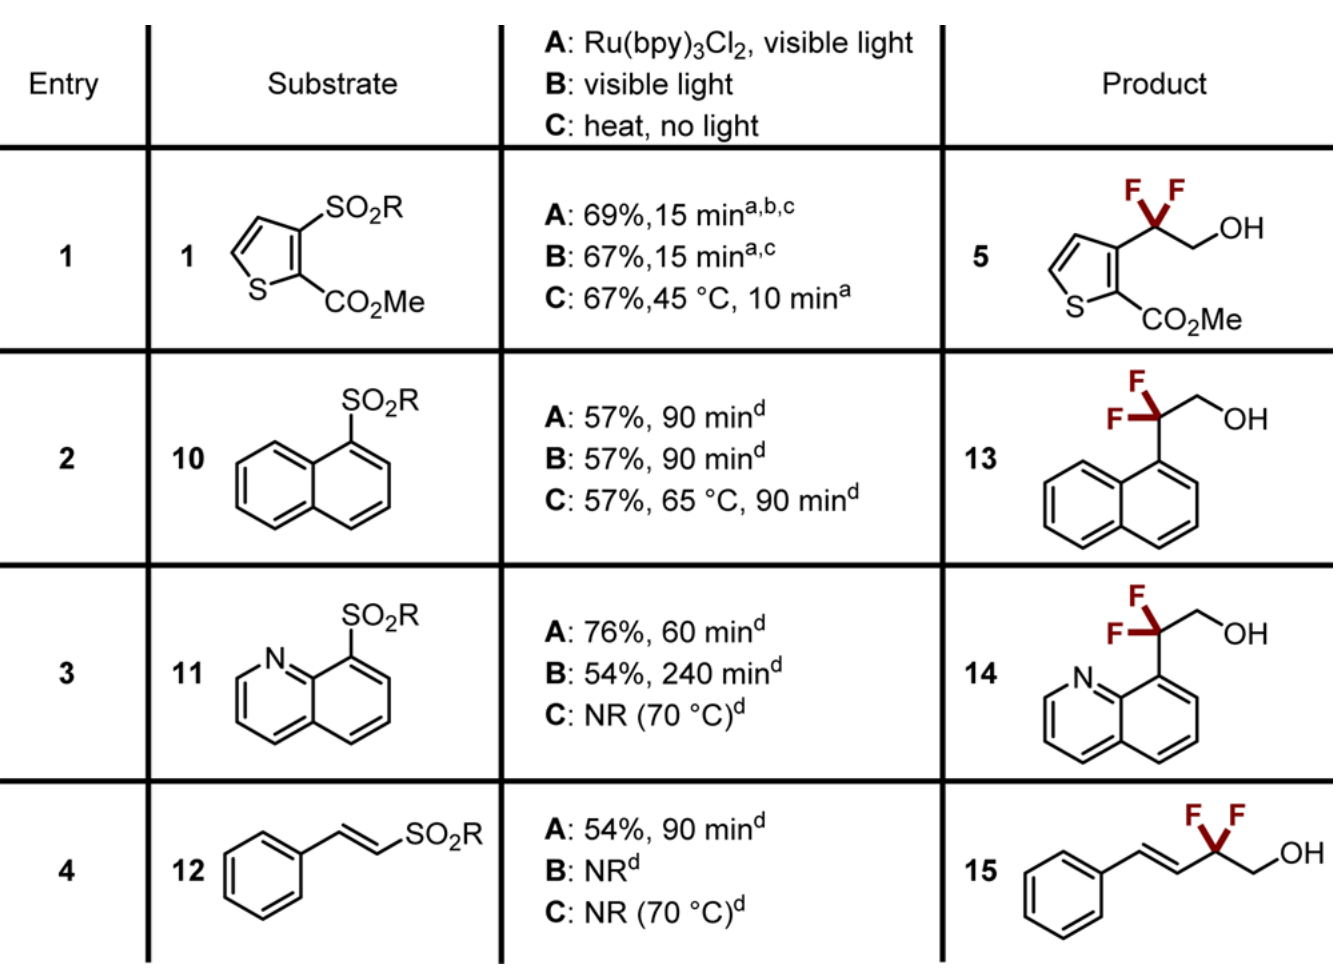

[{'image_id': 'acs.oprd.6b00126-Table-c2.png',
  'predicted_label': 'multiple chemical structures',
  'program': 'ChemIC',
  'program_version': '1.2'}]

In [223]:
# Load an image for testing
image_path = '../Benchmark/single_image/acs.oprd.6b00126-Table-c2.png'  # Replace with the actual path to your image file
image = Image.open(image_path).convert('RGB')
# Send POST request to classify and predict images
recognition_results = client.classify_image(image_path)
display(image)
recognition_results

In [227]:
# Uncomment to load your image for testing. Replace with the actual path to your image file
# image_path =  'ABSOLUTE_PATH_TO_IMAGE_FILE
# image = Image.open(image_path).convert('RGB')
# Send POST request to classify and predict images
# recognition_results = client.classify_image(image_path)
# display(image)
# recognition_results

# 4. Run cell below to classify images in directory Benchmark/1000_images. 
## It could take ca. 1 minute to process images

In [245]:
%%time
# Replace with the actual path to your image file
image_path = '../Benchmark/100_images'  
# File classification_<images_folder>.csv will be created in folder Benchmark
recognition_results = client.classify_image(image_path)
# Convert results to pands Dataframe
df = pd.DataFrame(recognition_results)
df.sort_values(by='image_id', inplace=True, ignore_index=True)
df

CPU times: user 1.85 ms, sys: 1.07 ms, total: 2.92 ms
Wall time: 2.6 s


,image_id,predicted_label,program,program_version
0,1b8a029400.png,no chemical structures,ChemIC,1.2
1,1b8a7d289f.png,no chemical structures,ChemIC,1.2
2,27763.png,single chemical structure,ChemIC,1.2
3,27794.png,single chemical structure,ChemIC,1.2
4,310003736834.png,chemical reactions,ChemIC,1.2
...,...,...,...,...
95,WO-2021090855-A1_image_2368.tif,multiple chemical structures,ChemIC,1.2
96,WO-2021090855-A1_image_2392.tif,multiple chemical structures,ChemIC,1.2
97,WO-2021090855-A1_image_2409.tif,multiple chemical structures,ChemIC,1.2
98,acs.oprd.5b00371-Scheme-c5-3.png,single chemical structure,ChemIC,1.2


In [246]:
export_dir = '../Benchmark'
df.to_csv(f'{export_dir}/{Path(image_path).name}_{datetime.datetime.now().strftime("%Y-%m-%dT%H:%M:%S")}.csv', index=False)